##### Import data

In [79]:
from util import load_fabric_data, extract_label_grouping, extract_label_grouping, load_fabric_images
import numpy as np
from matplotlib import image

In [80]:
fids, fdata = load_fabric_data('fabric_data/label_json/**/**.json')
ftype1, ftype2 = extract_label_grouping(fdata)

In [81]:
path = 'fabric_data/temp/'
labels, imgs = load_fabric_images(path, fids, fdata, ftype2)

In [82]:
n_samples = len(imgs)
print("Number of samples:", n_samples)

Number of samples: 3475


##### Padding
- https://blog.csdn.net/wuzqChom/article/details/74785643
- https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
- https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape

In [ ]:
import cv2

In [83]:
imgs = [cv2.resize(img,(200, 200)) for img in imgs]

##### Split data

In [86]:
from sklearn.model_selection import train_test_split

In [85]:
train_images, test_images, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.3, random_state=1)

In [84]:
print("#Training data: {}\n#Testing data: {}\n#Class: {}".format(len(train_images), len(test_images), len(set(train_labels))))

#Training data: 2432
#Testing data: 1043
#Class: 9


##### Normalize data

In [87]:
train_images, test_images, train_labels, test_labels = np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [88]:
train_images.shape

(2432, 200, 200, 6)

##### Generate fake data

##### Create model
- https://www.tensorflow.org/tutorials/images/classification

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [89]:
input_shape = (200, 200, 6)

In [90]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9))

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 32)      1760      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [92]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
76/76 [==============================] - 68s 901ms/step - loss: 1.6208 - accuracy: 0.4589 - val_loss: 1.3183 - val_accuracy: 0.5657
Epoch 2/10
76/76 [==============================] - 56s 738ms/step - loss: 1.0640 - accuracy: 0.6493 - val_loss: 1.1302 - val_accuracy: 0.6385
Epoch 3/10
76/76 [==============================] - 55s 717ms/step - loss: 0.8239 - accuracy: 0.7360 - val_loss: 1.1455 - val_accuracy: 0.6174
Epoch 4/10
76/76 [==============================] - 55s 721ms/step - loss: 0.6233 - accuracy: 0.8030 - val_loss: 1.1700 - val_accuracy: 0.6539
Epoch 5/10
76/76 [==============================] - 58s 768ms/step - loss: 0.4363 - accuracy: 0.8701 - val_loss: 1.2134 - val_accuracy: 0.6616
Epoch 6/10
76/76 [==============================] - 58s 759ms/step - loss: 0.3154 - accuracy: 0.8902 - val_loss: 1.3739 - val_accuracy: 0.6644
Epoch 7/10
76/76 [==============================] - 57s 754ms/step - loss: 0.2915 - accuracy: 0.9157 - val_loss: 1.5695 - val_accuracy: 0.6625

##### Testing

33/33 - 5s - loss: 1.6620 - accuracy: 0.6731


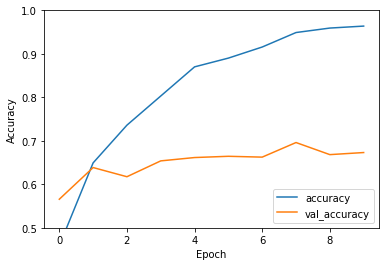

In [93]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [94]:
print(test_acc)

0.6730585098266602
